In [40]:

import matplotlib.pyplot as plt
import numpy as np

class GradientDescent:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        self.cost_history = []
        for i in range(self.num_iterations):
            gradients = self.__gradient(X, y)
            self.theta -= gradients * self.learning_rate
            self.cost_history.append(self.__cost(X, y))
        self.__plot_cost(X, y)
            
    def predict(self, X):
        return X @ self.theta
    
    def __gradient(self, X, y):
        y_pred = self.predict(X)
        error = y_pred - y
        return (X.T @ error) / len(X)
    
    def __cost(self, X, y):
        y_pred = self.predict(X)
        error = y_pred - y
        return (error ** 2).mean() / 2
    
    def __plot_cost(self, X, y):
        theta0_vals = np.linspace(-1, 3, 100)
        theta1_vals = np.linspace(-1, 3, 100)
        costs = np.zeros((len(theta0_vals), len(theta1_vals)))
        for i in range(len(theta0_vals)):
            for j in range(len(theta1_vals)):
                self.theta[0]=theta0_vals[i]
                self.theta[1]=theta1_vals[j]
                costs[i, j] = self.__cost(X, y)
        plt.contour(theta0_vals, theta1_vals, costs, levels=np.logspace(-1,2, 20))
        plt.scatter(self.theta[0], self.theta[1], c='r')
        plt.xlabel('theta0')
        plt.ylabel('theta1')
        plt.show()

In [41]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [42]:
X = df.iloc[:,0:2]
Y = df["Profit"]

C:\Users\Lnovo\AppData\Local\Temp\ipykernel_8364\1445583181.py:40: UserWarning: No contour levels were found within the data range.
  plt.contour(theta0_vals, theta1_vals, costs, levels=np.logspace(-1,2, 20))


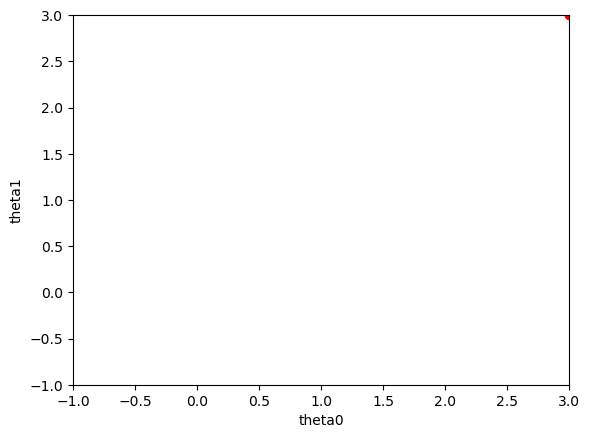

In [43]:
GD = GradientDescent()
GD.fit(X,Y)


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error()